# Basic Statistic and Data Visualization

Phần này tiếp tục giới thiệu một số cách thống kê, khảo sát cơ bản và vẽ chart để phân tích dữ liệu.

## 1. Statistic

Create a DataFrame of Titanic dataset

In [1]:
import pandas as pd

titanic = pd.read_csv('../data/01-titanic-train-set.csv')

### 1.1. Khảo sát thuộc tính của dữ liệu

#### 1.1.1. Khảo sát số lượng hàng, cột

In [3]:
row, column = titanic.shape
print("Row: ", row)
print("Column: ", column)

Row:  891
Column:  12


#### 1.1.2. Xem tên các cột

In [5]:
list(titanic.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

**Thống kê cơ bản đối với kiểu dữ liệu số học**

Xem thêm:
- [Pandas DataFrame.describe() method](https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/)

In [5]:
percentiles = [ .1, .25, .5, .75, .99 ] # cài đặt percentile
includes = ['object', 'float', 'int'] # bao gồm kiểu nào
exclude = [ 'string' ] # loại bỏ kiểu nào

titanic.describe(percentiles=percentiles, include=includes, exclude=exclude).T

,count,unique,top,freq,mean,std,min,10%,25%,50%,75%,99%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,90,223.5,446,668.5,882.1,891
Survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,0,1,1,1
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,1,2,3,3,3,3
Name,891,891,"Andersson, Miss. Ingeborg Constanzia",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,14,20.125,28,38,65.87,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,0,1,5,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,0,4,6
Ticket,891,681,CA. 2343,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.55,7.9104,14.4542,31,249.006,512.329


**Thống kê cơ bản một cột dữ liệu**

In [11]:
# cách dùng tương tự phần trên
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Với kiểu dữ liệu rời rạc, thống kê các giá trị duy nhất

In [6]:
print(list(titanic.Sex.unique()))
print(list(titanic.Survived.unique()))

['male', 'female']
[0, 1]


### 1.2. Khảo sát quan hệ của dữ liệu

#### 1.2.1. Tìm mối tương quan bằng Hiệp phương sai

**Hiệp phương sai** (Covariance) biểu diễn sự cùng tăng/giảm của 2 biến dữ liệu. Công thức:

$$Cov(X,Y)=\frac{\sum_{i}^{n}(x_{i}-x_{avg})(y_{i}-y_{avg})}{n-1}$$

Nếu $Cov(X,Y) > 0$, thì $X$ và $Y$ đồng biến, nghĩa là cùng tăng/cùng giảm.


In [7]:
# VD: tuổi có tương quan với sống sót hay không?
titanic.Age.cov(titanic.Survived)

-0.5512960976817095

#### 1.2.2. Xác định mức độ tương quan bằng Hệ số tương quan

**Hệ số tương quan** (Correlation coefficient) là chỉ số thống kê đo lường mức độ mạnh yếu của mối quan hệ giữa hai biến số. Công thức:

$$\rho_{X,Y} = \frac{Cov(X,Y)}{\sigma_{X}\sigma_{Y}}$$

Tính chất:

- $-1 \leq \rho_{X,Y} \leq 1$
- $\rho_{X,Y} \leq  0$: Hai biến tương quan âm hoặc nghịch biến
- $\rho_{X,Y} \ge  0$: Hai biến tương quan dương hoặc đồng biến
- $\rho_{X,Y} = 0$: Hai biến độc lập, không có tương quan


In [9]:
# VD: tuổi có tương quan với sống sót hay không?
titanic.Age.corr(titanic.Survived)

-0.07722109457217768

## 2. Data Visualization

Why:
- Graphs help us understand data, especially qualitative aspects of data, possibly more quickly and easily
- Graphs are a powerful tool to summarize data
- Graphs help us identify patterns, spot outliers, detect corrupt data
- Graphs help us see the relationships among features, and between features and labels, therefore help us in model selection and feature selection.


In [13]:
import matplotlib.pyplot as plt
import math

### 2.1. Line chart

- A line plot is generally used to present observations collected at regular intervals.
- The x-axis represents the regular interval, such as time.
- The y-axis shows the observations, ordered by the x-axis and connected by a line.


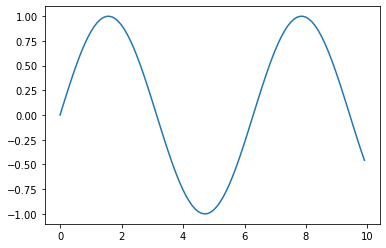

In [16]:
# consistent interval for x-axis 
x = [x*0.1 for x in range(100)] 
# function of x for y-axis
y = [math.sin(i) for i in x ]
# create line plot
plt.plot(x, y)
# show line plot
plt.show()

### 2.2. Bar chart

- A bar chart is generally used to present relative quantities for multiple categories.
- The x-axis represents the categories and are spaced evenly.
- The y-axis represents the quantity for each category and is drawn as a bar from the baseline to the appropriate level on the y-axis.


<BarContainer object of 2 artists>

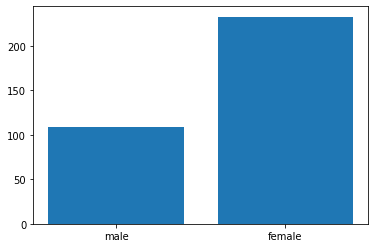

In [20]:
x_bar = list(titanic.Sex.unique())
y_bar = [ len(titanic[(titanic.Survived == 1) & (titanic.Sex == i)]) for i in x_bar ]

plt.bar(x_bar, y_bar)

### 2.3. Histogram

- A histogram plot is generally used to summarize the distribution of a data sample.
- The x-axis represents discrete bins or intervals for the observations.


/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([36., 19., 63., 65., 52., 24., 21.,  9.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

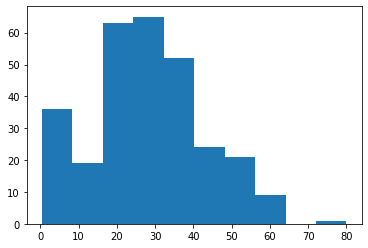

In [22]:
survived_dist = titanic[titanic.Survived == 1].Age
plt.hist(list(survived_dist))

### 2.4. Box and Whisker

- A box and whisker plot, or boxplot for short, is generally used to summarize the distribution of a data sample.
- The x-axis is used to represent the data sample, where multiple boxplots can be drawn side by side on the x-axis if desired.
- The y-axis represents the observation values.
- A box is drawn to summarize the middle 50
- The median, or 50th percentile, is drawn with a line.
- A value called the interquartile range, or IQR, is calculated as 1.5 * the difference between the 75th and 25th percentiles. Lines called whiskers are drawn extending from both ends of the box with the length of the IQR to demonstrate the expected range of sensible values in the distribution. Observations outside the whiskers might be outliers and are drawn with small circles.


/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'whiskers': [<matplotlib.lines.Line2D at 0x121080ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x121080a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x120ff7e90>,
 'medians': [<matplotlib.lines.Line2D at 0x12106fc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x12102bd50>,
 'means': []}

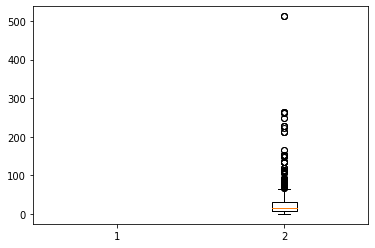

In [26]:
plt.boxplot([ titanic.Age, titanic.Fare])

### 2.5. Scatter

- A scatter plot (or ‘scatterplot’) is generally used to summarize the relationship between two paired data samples.
- Paired data samples means that two measures were recorded for a given observation, such as the weight and height of a person.
- The x-axis represents observation values for the first sample, and the y-axis represents the observation values for the second sample. Each point on the plot represents a single observation.


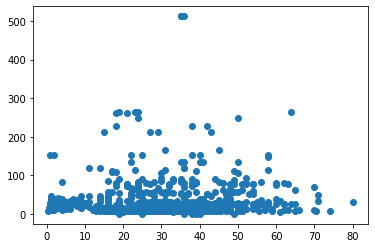

In [27]:
plt.scatter(titanic.Age, titanic.Fare)